
# Project: Investigate a Dataset - [Database_TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> ### Dataset Description 

Initially
I chose the project (Database_TMDb_movie_data) due to the lack of time,
    and I expect that the topic will be easy to understand,

Secondly, after examining the data in principle, the following was found:

A - The data is a file with the extension (.csv),
    and it consists of 21 columns and 10,866 rows.

B - The names of the columns in order with a very simple description of some of them:

 id - - - - - - movie code
 
 imdb_id - - - - - - - site code for the movie
 
 popularity - - - - - - rating the popularity of the movie
 
 budget - - - - - - movie cost
 
 revenue - - - - - - movie revenue
 
 original_title - - - - - - movie name
 
 cast - - - - - - staff and actoures
 
 homepage - - - - - - movie link
 
 director - - - - - - -
 tagline - - - - - - - about the movie in two words
 
 keywords - - - - - - - another description of the movie in one word
 
 overview - - - - - - - Quick review of the summary of events
 
 runtime - - - - - - movie runtime
 
 genres - - - - - - movie rating
 
 production_companies - - - - - - name of the producing company
 
 release_date - - - - - - - premiere date
 
 vote_count - - - - - - - the number of people who voted
 
 vote_average - - - - - - - Average rating value for each movie
 
 release_year - - - - - - - year of release
 
 budget_adj - - - - - - - Duplicate movie cost
 
 revenue_adj - - - - - - - repeat movie revenue 

C - There are columns that are not of great importance
 ( imdb_id , homepage , tagline , keywords , overview , budget_adj , budget_adj )
 
D - While there are columns of great importance
(id, original_title, popularity, budget, revenue, genres, production_companies, vote_count, vote_average, release_year)


> ### Question(s) for Analysis

1 - Which movie achieved the highest revenue, and is it the highest cost?

2 - What are the ratings that achieved the mean profit each year?

3 - What is the largest production company in terms of the number of films produced in that list, with a look at some analyzes and statistics about that company in that period?


### At first we call the library that we may need, then we read the main file, then we do some commands that show us the identity of this file in terms of its dimensions and content and the errors, if any, so that we can do the necessary analyzes better (after dealing with errors and avoiding them)

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import requests
from bs4 import BeautifulSoup

In [2]:
# loading data and print some rows, and it is very useful in the case of multiple files to read
def df_printer(file_path):
    df= pd.read_csv('tmdb-movies.csv')
    return df
df = df_printer('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [9]:
sum(df.duplicated())

1

In [10]:
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [11]:
#The greatest value for the cost
df[df['budget_adj'] == df['budget_adj'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


In [12]:
#The greatest value for the vote_average
df[df['vote_average'] == df['vote_average'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


In [13]:
#Lowest value for the vote_average
df[df['vote_average'] == df['vote_average'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7772,25055,tt0960835,0.121120,0,0,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,NaN,Leigh Scott,NaN,...,About a race of alien robots that have conquer...,86,Action|Adventure|Science Fiction,"Asylum, The",6/26/07,10,1.5,2007,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [14]:
#Lowest value for the vote_count
df[df['vote_count'] == df['vote_count'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
240,363689,tt4229298,0.532700,0,0,The Unspoken,Jodelle Ferland|Sunny Suljic|Neal McDonough|Ma...,NaN,Sheldon Wilson,NaN,...,In 1997 the close-knit Anderson family vanishe...,90,Thriller|Horror,Lighthouse Pictures|Sapphire Fire Limited,10/24/15,10,4.1,2015,0.000000e+00,0.000000e+00
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
345,361263,tt4505830,0.342530,0,0,Jesse Stone: Lost in Paradise,Tom Selleck|William Devane|Gloria Reuben|Luke ...,http://www.hallmarkchannel.com/jesse-stone-los...,Robert Harmon,NaN,...,"Once a Los Angeles homicide detective, Police ...",87,Drama|TV Movie|Crime|Mystery,Sony Pictures Television,10/18/15,10,5.6,2015,0.000000e+00,0.000000e+00
386,316885,tt4180576,0.291244,0,0,Bridgend,Hannah Murray|Steven Waddington|Adrian Rawlins...,NaN,Jeppe RÃ¸nde,NaN,...,"Over a 5-year period in Bridgend in Wales, 79 ...",95,Drama,Blenkov & SchÃ¸nnemann Pictures|Four Sons Pict...,1/22/15,10,5.7,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,54000,tt0077539,0.227338,6727000,0,Fedora,William Holden|Marthe Keller|Hildegard Knef|Jo...,NaN,Billy Wilder,Youth had been a habit of hers for so long tha...,...,An ambitious Hollywood hustler becomes involve...,114,Drama|Romance,SociÃ©tÃ© FranÃ§aise de Production (SFP),5/30/78,10,4.9,1978,2.248635e+07,0.000000e+00
10808,40060,tt0077904,0.129123,0,0,The Manitou,Tony Curtis|Michael Ansara|Susan Strasberg|Ste...,NaN,William Girdler,Evil does not dieâ€¦ It waits to be re-born!,...,A psychic's girlfriend finds out that a lump o...,104,Horror,Melvin Simon Productions|Mid-America Pictures|...,4/28/78,10,5.8,1978,0.000000e+00,0.000000e+00
10809,31428,tt0078295,0.128231,0,0,Someone's Watching Me!,Lauren Hutton|David Birney|Adrienne Barbeau|Le...,NaN,John Carpenter,NaN,...,A woman is being watched in her apartment by a...,97,Horror|Mystery|TV Movie|Thriller,Warner Bros. Television,11/27/78,10,5.7,1978,0.000000e+00,0.000000e+00
10812,31948,tt0077629,0.318883,0,5438927,Gray Lady Down,Charlton Heston|David Carradine|Stacy Keach|Ne...,NaN,David Greene,Trapped underwater... with time running out.,...,"The USS Neptune, a nuclear submarine, is sunk ...",111,Thriller|Adventure|History|Drama,Universal Pictures|The Mirisch Corporation,3/10/78,10,6.1,1978,0.000000e+00,1.818071e+07


In [15]:
##The largest value for the vote_count
df[df['vote_count'] == df['vote_count'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,160000000.0,825500000.0


In [16]:
df.columns[()]

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [17]:
for i, v in enumerate(df.columns):# View the index number and label for each column
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [18]:
df['genres'].value_counts()#Calculate the number of repetitions (in the case of text and non-clusterable values) or the total value (in the case of additive numbers) for each unique value in each column

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

## Data Cleaning

### After an initial review of our data, there were several errors.
#### First - there are many columns with missing data, and others with zero values, 
#### Therefore, those values and empty cells must be modified so as not to affect the analysis process by placing the word ("NUN") as a string in those cells and instead of the zero values.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [20]:
#Variable to fill empty cells and zero
nun = 'NUN'

#### To handle missing data with effect on the origin of the table

In [21]:
df.fillna(nun, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10866 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   homepage              10866 non-null  object 
 8   director              10866 non-null  object 
 9   tagline               10866 non-null  object 
 10  keywords              10866 non-null  object 
 11  overview              10866 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  10866 non-null  object 
 15  release_date       

#### Second, there are two main columns with zero values that are considered an error (“budget” and “revenue”), where the “budget” has 5696 cells with a value of zero, and the “revenue” has 1315 zero values, and they will be replaced by a value of string “NUN”

In [23]:
df.describe().budget# To look at the data status of the values of this column

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [24]:
df[df['budget'] == 0.0]# Display column content for zero values

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NUN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NUN,Jean-Baptiste LÃ©onetti,NUN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NUN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NUN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NUN,Bruce Brown,NUN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NUN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NUN,Eldar Ryazanov,NUN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [25]:
df[df['budget'] == 0.0] = df[df['budget'] == nun]# Replace the zero-value cells with nun

In [26]:
df[df['budget'] == 0.0]#Display column content for zero values

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [27]:
df.describe().budget# To look at the data status of the values of this column

count    5.170000e+03
mean     3.073943e+07
std      3.890065e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [28]:
df.describe().revenue# To look at the data status of the values of this column

count    5.170000e+03
mean     8.027566e+07
std      1.594749e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.100078e+07
75%      8.942473e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [29]:
df[df['revenue'] == 0.0]# Display column content for zero values

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208.0,tt2231253,2.932340,30000000.0,0.0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NUN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92.0,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481.0,5.3,2015.0,2.759999e+07,0.0
67,334074.0,tt3247714,2.331636,20000000.0,0.0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96.0,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280.0,5.4,2015.0,1.839999e+07,0.0
93,307663.0,tt3480796,1.872696,10000000.0,0.0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NUN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96.0,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181.0,4.1,2015.0,9.199996e+06,0.0
133,157827.0,tt2217859,1.251681,11000000.0,0.0,Louder Than Bombs,Gabriel Byrne|Isabelle Huppert|Jesse Eisenberg...,http://www.motlys.com/louder-than-bombs,Joachim Trier,NUN,...,"Three years after his wife, acclaimed photogra...",109.0,Drama,Motlys|Arte France CinÃ©ma|Animal Kingdom,5/18/15,43.0,6.3,2015.0,1.012000e+07,0.0
145,294963.0,tt2494362,1.073349,1800000.0,0.0,Bone Tomahawk,Kurt Russell|Richard Jenkins|Matthew Fox|Lili ...,NUN,S. Craig Zahler,May the Lord have mercy and grant you a swift ...,...,"During a shootout in a saloon, Sheriff Hunt in...",132.0,Horror|Western|Adventure|Drama,Caliber Media Company|The Fyzz Facility|Realbu...,10/23/15,220.0,6.3,2015.0,1.655999e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,2661.0,tt0060153,0.410366,1377800.0,0.0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NUN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,The Dynamic Duo faces four super-villains who ...,105.0,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/66,99.0,5.9,1966.0,9.256081e+06,0.0
10832,23030.0,tt0060121,0.358161,4800000.0,0.0,Arabesque,Gregory Peck|Sophia Loren|Alan Badel|Kieron Mo...,NUN,Stanley Donen,Ultra Mod. Ultra Mad. Ultra Mystery.,...,Story of international intrigue involving a un...,105.0,Action|Adventure|Thriller,Universal Pictures|Stanley Donen Films,5/5/66,14.0,5.6,1966.0,3.224647e+07,0.0
10841,42701.0,tt0062262,0.264925,75000.0,0.0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,NUN,Monte Hellman,"Suspenseful desert pursuit in the ""High Noon"" ...",...,A hired gun seeks to enact revenge on a group ...,82.0,Western,Proteus Films,10/23/66,12.0,5.5,1966.0,5.038511e+05,0.0
10855,13343.0,tt0059221,0.141026,700000.0,0.0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NUN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,Luther Heggs aspires to being a reporter for h...,90.0,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14.0,6.1,1966.0,4.702610e+06,0.0


In [30]:
df[df['revenue'] == 0.0] = df[df['revenue'] == nun]# Replace the zero-value cells with nun

In [31]:
df[df['revenue'] == 0.0]#Display column content for zero values

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [32]:
df.describe().revenue#To look at the data status of the values of this column

count    3.855000e+03
mean     1.076589e+08
std      1.765248e+08
min      2.000000e+00
25%      1.357645e+07
50%      4.479322e+07
75%      1.241530e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [33]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397.0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,76341.0,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,262500.0,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,140607.0,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
4,168259.0,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09
5,281957.0,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929.0,7.2,2015.0,1.241999e+08,4.903142e+08
6,87101.0,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598.0,5.8,2015.0,1.425999e+08,4.053551e+08
7,286217.0,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572.0,7.6,2015.0,9.935996e+07,5.477497e+08
8,211672.0,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893.0,6.5,2015.0,6.807997e+07,1.064192e+09
9,150540.0,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can

#### Third, there is a repetition error in the rows, where only one row was found with this error, so it must be deleted

In [34]:
sum(df.duplicated())# Searches for duplicate rows by True or False (repeat all row data)

7011

In [35]:
df.drop_duplicates(inplace=True)#To fix the error of duplicate rows with effect on the origin of the table

In [36]:
sum(df.duplicated())# Researches for duplicate rows by True or False (repeat all row data)

0

In [37]:
df.shape

(3855, 21)

#### Fourth, insert one column with a type error ('release_date') as it is present as a string while it must appear as a date

In [38]:
df['release_date'].describe()#To look at the data status of the values of this column

count         3854
unique        2885
top       12/25/14
freq             7
Name: release_date, dtype: object

In [39]:
df['release_date'] = pd.to_datetime(df['release_date'])#Handles a datatype read error (the error is reading time as a string) with an effect on the origin of the table

In [40]:
df['release_date'].describe()#To look at the data status of the values of this column

C:\Users\k\AppData\Local\Temp/ipykernel_6412/267299241.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['release_date'].describe()#To look at the data status of the values of this column


count                    3854
unique                   2885
top       2014-12-25 00:00:00
freq                        7
first     1972-03-12 00:00:00
last      2071-12-29 00:00:00
Name: release_date, dtype: object

#### Fifthly, there are some columns that are not important in the analysis from our point of view and we will not rely on them in this analysis, so we see that we reduce the number of those columns by class to suit our needs, as we will dispense with columns ("imdb_id", "cast", "homepage" , "tagline,","keywords", "overview", "budget_adj", "revenue_adj")

In [41]:
df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'keywords', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [42]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397.0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015.0
1,76341.0,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185.0,7.1,2015.0
2,262500.0,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480.0,6.3,2015.0
3,140607.0,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292.0,7.5,2015.0
4,168259.0,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947.0,7.3,2015.0


In [43]:
df.shape

(3855, 13)

# Research Question 1 (1 - Which movie achieved the highest revenue, and is it the highest cost?

#### Adding a profit colmun = revenue - budget

In [44]:
df['profit'] = df['revenue'] - df['budget']

In [45]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397.0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015.0,1.363529e+09
1,76341.0,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185.0,7.1,2015.0,2.284364e+08
2,262500.0,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480.0,6.3,2015.0,1.852382e+08
3,140607.0,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292.0,7.5,2015.0,1.868178e+09
4,168259.0,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947.0,7.3,2015.0,1.316249e+09


In [46]:
df[df['revenue'] == df['revenue'].max()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1386,19995.0,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458.0,7.1,2009.0,2.544506e+09


### Avatar is the highest-grossing movie overall

In [47]:
df[df['budget'] == df['budget'].max()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
2244,46528.0,0.25054,425000000.0,11087569.0,The Warrior's Way,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74.0,6.4,2010.0,-413912431.0


### The Warrior's Way is the most expensive movie overall

# Research Question 2  (2 - What are the ratings that achieved the mean profit each year?)

In [48]:
mo = df.groupby(['release_year'], as_index=False)['profit'].mean()

In [49]:
mo

,release_year,profit
0,1960.0,2.163961e+07
1,1961.0,2.990832e+07
2,1962.0,2.383998e+07
3,1963.0,1.923531e+07
4,1964.0,4.209691e+07
5,1965.0,7.985637e+07
6,1966.0,1.049374e+07
7,1967.0,4.894882e+07
8,1968.0,1.869686e+07
9,1969.0,5.171575e+07


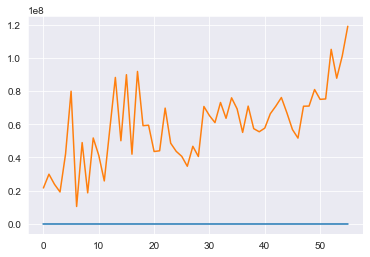

In [50]:
plt.plot(mo)
plt.show()

#### The previous table indicates the average earnings of films in each year, and represented in a linear way, so that it indicates that, despite the fluctuation of some years, but in the end profits are increasing (and it is possible that it is only the effect of monetary inflation)

# Research Question 3  ( What is the largest production company in terms of the number of films produced in that list, with a look at some analyzes and statistics about that company in that period)

#### Review of companies and the number of films they have produced

In [51]:
df['production_companies'].value_counts()

Paramount Pictures                                                                                                  77
Universal Pictures                                                                                                  57
NUN                                                                                                                 46
Columbia Pictures                                                                                                   39
New Line Cinema                                                                                                     38
                                                                                                                    ..
Universal Pictures|Media Rights Capital|Gambit Pictures|Electric Shepherd Productions                                1
Virgin Produced|Mark Canton Productions                                                                              1
Paramount Vantage|Andrea Sperling Productions|In

#### It turns out that the production_companies company has the largest number of films with the number of h films about that period

In [52]:
df_pp = df.query('production_companies == "Paramount Pictures"')# Create a sub-table for a company production_companies

In [53]:
df_pp.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1533,22947.0,0.598075,25000000.0,163670000.0,Up in the Air,Jason Reitman,109.0,Drama|Romance,Paramount Pictures,2009-09-05,751.0,6.6,2009.0,138670000.0
1996,45317.0,1.054685,25000000.0,9190869.0,The Fighter,David O. Russell,116.0,Drama,Paramount Pictures,2010-12-17,965.0,7.1,2010.0,-15809131.0
2444,10398.0,0.993492,70000000.0,177841558.0,Double Jeopardy,Bruce Beresford,105.0,Drama|Mystery|Thriller|Crime,Paramount Pictures,1999-09-24,144.0,6.1,1999.0,107841558.0
2565,15256.0,0.246669,6000000.0,6852450.0,200 Cigarettes,Risa Bramon Garcia,101.0,Comedy|Drama|Romance,Paramount Pictures,1999-02-26,25.0,6.5,1999.0,852450.0
2779,11456.0,0.323191,75000000.0,54249294.0,Domestic Disturbance,Harold Becker,89.0,Mystery|Thriller|Crime,Paramount Pictures,2001-10-30,50.0,5.4,2001.0,-20750706.0


In [54]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1533 to 10654
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    77 non-null     float64       
 1   popularity            77 non-null     float64       
 2   budget                77 non-null     float64       
 3   revenue               77 non-null     float64       
 4   original_title        77 non-null     object        
 5   director              77 non-null     object        
 6   runtime               77 non-null     float64       
 7   genres                77 non-null     object        
 8   production_companies  77 non-null     object        
 9   release_date          77 non-null     datetime64[ns]
 10  vote_count            77 non-null     float64       
 11  vote_average          77 non-null     float64       
 12  release_year          77 non-null     float64       
 13  profit          

### general review

In [55]:
df_pp.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,77.000000,77.000000,7.700000e+01,7.700000e+01,77.000000,77.000000,77.000000,77.000000,7.700000e+01
mean,11143.285714,0.873188,2.486110e+07,9.144075e+07,107.337662,316.740260,6.187013,1991.181818,6.657964e+07
std,13063.853441,0.848379,1.815611e+07,1.076829e+08,15.827699,602.198503,0.704562,9.133120,1.039126e+08
min,13.000000,0.017498,1.000000e+06,6.852450e+06,83.000000,12.000000,4.500000,1970.000000,-4.014839e+07
25%,1537.000000,0.400179,1.100000e+07,2.200000e+07,95.000000,62.000000,5.700000,1985.000000,1.145834e+07
50%,9725.000000,0.644448,2.300000e+07,6.870699e+07,106.000000,144.000000,6.200000,1991.000000,4.596947e+07
75%,12094.000000,1.161942,3.500000e+07,1.180000e+08,117.000000,304.000000,6.600000,1996.000000,8.480000e+07
max,76493.000000,6.715966,7.500000e+07,6.779454e+08,162.000000,4856.000000,8.100000,2012.000000,6.229454e+08


#### What is the Highest revenue movie at Paramount Pictures ?

In [56]:
df_pp[df_pp['revenue'] == df_pp['revenue'].max()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
4179,13.0,6.715966,55000000.0,677945399.0,Forrest Gump,Robert Zemeckis,142.0,Comedy|Drama|Romance,Paramount Pictures,1994-07-06,4856.0,8.1,1994.0,622945399.0


Highest revenue movie at Paramount Pictures is Forrest Gump

#### What is the Less revenue movie at Paramount Pictures ?

In [57]:
df_pp[df_pp['revenue'] == df_pp['revenue'].min()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
2565,15256.0,0.246669,6000000.0,6852450.0,200 Cigarettes,Risa Bramon Garcia,101.0,Comedy|Drama|Romance,Paramount Pictures,1999-02-26,25.0,6.5,1999.0,852450.0


Less revenue movie at Paramount Pictures is 200 Cigarettes

#### What is the Highest budget movie at Paramount Pictures ?

In [58]:
df_pp[df_pp['budget'] == df_pp['budget'].max()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
2779,11456.0,0.323191,75000000.0,54249294.0,Domestic Disturbance,Harold Becker,89.0,Mystery|Thriller|Crime,Paramount Pictures,2001-10-30,50.0,5.4,2001.0,-20750706.0


Highest budget movie at Paramount Pictures is Domestic Disturbance

#### What is the Less budget movie at Paramount Pictures ?

In [59]:
df_pp[df_pp['budget'] == df_pp['budget'].min()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
8897,150.0,1.161942,1000000.0,78868508.0,48 Hrs.,Walter Hill,96.0,Thriller|Action|Comedy|Crime|Drama,Paramount Pictures,1982-12-07,171.0,6.1,1982.0,77868508.0


Less budget movie at Paramount Pictures is 48 Hrs.

#### Calculate average profit for each year

In [60]:
df_pp.groupby(['release_year'], as_index=False)['profit'].mean()

,release_year,profit
0,1970.0,1.342000e+08
1,1974.0,1.951660e+07
2,1976.0,1.471559e+07
3,1979.0,1.040000e+08
4,1980.0,4.894861e+07
5,1981.0,2.047278e+07
6,1982.0,4.933251e+07
7,1983.0,6.590694e+07
8,1984.0,4.022917e+07
9,1985.0,2.079002e+07


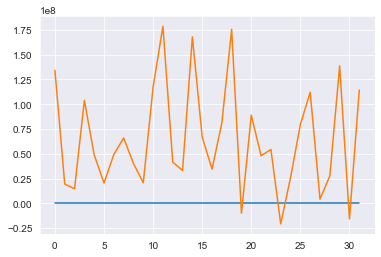

In [61]:
plt.plot(df_pp.groupby(['release_year'], as_index=False)['profit'].mean())
plt.show()

#### The previous table indicates the average earnings of films in each year for Paramount Pictures.Co , and represented in a linear way, so that it indicates that, despite the fluctuation of some years

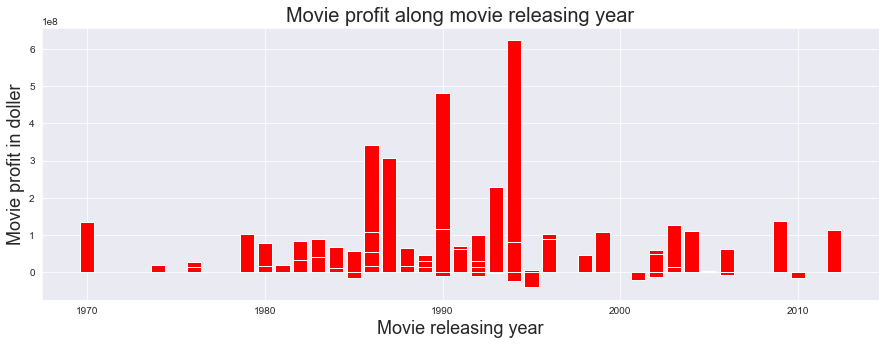

In [62]:
plt.subplots(figsize=(15, 5))
plt.bar(df_pp['release_year'], df_pp['profit'],color=['red'] )
plt.title('Movie profit along movie releasing year',fontsize=20)
plt.xlabel('Movie releasing year',fontsize=18)
plt.ylabel('Movie profit in doller',fontsize=18)
plt.grid(True)

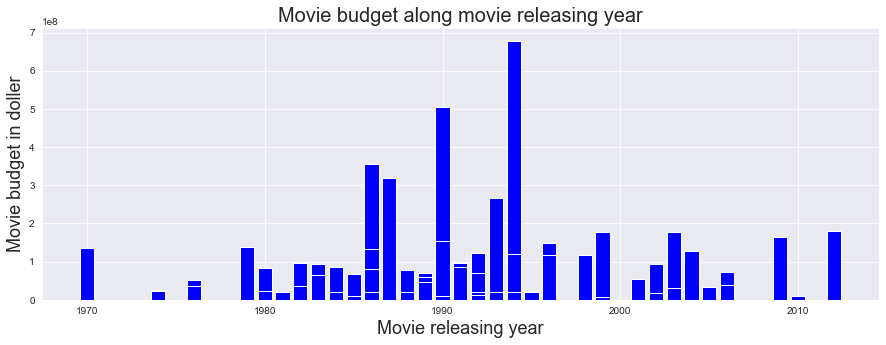

In [63]:
plt.subplots(figsize=(15, 5))
plt.bar(df_pp['release_year'], df_pp['revenue'],color=['blue'] )
plt.title('Movie budget along movie releasing year',fontsize=20)
plt.xlabel('Movie releasing year',fontsize=18)
plt.ylabel('Movie budget in doller',fontsize=18)
plt.grid(True)

In the first part, it is clear that some films have achieved minor losses, but the second drawing shows that the total profits for the year cover those losses.

In [64]:
df_pp.groupby(['release_year'], as_index=False)['original_title'].count()

,release_year,original_title
0,1970.0,1
1,1974.0,2
2,1976.0,3
3,1979.0,1
4,1980.0,2
5,1981.0,1
6,1982.0,4
7,1983.0,2
8,1984.0,2
9,1985.0,2


It turns out to us that the company started production in the year 1970, and the most years in which it produced a number of films were the years 1986 and 1995 equally, 5 films each year.

<a id='conclusions'></a>
## Conclusions

1 - Avatar is the highest-grossing movie overall

2 - The Warrior's Way is the most expensive movie overall

3 - The previous table indicates the average earnings of films in each year, and represented in a linear way, so that it indicates that, despite the fluctuation of some years, but in the end profits are increasing (and it is possible that it is only the effect of monetary inflation)

4 -  It turns out that the production_companies company has the largest number of films with the number of h films about that period

5 -  production_companies has the highest numbers of movies with 77 movie

6 - Highest revenue movie to production_companies  677945399.0 with Forrest Gump movie 

7 - Less revenue movie to production_companies 6852450.0 with is 200 Cigarettes movie

8 - Highest budget movie to production_companies 75000000.0 with is Domestic Disturbance movie

9 - Less budget movie to production_companies 1000000.0 with is 48 Hrs	movie

10 - The previous table indicates the average earnings of films in each year for Paramount Pictures.Co , and represented in a linear way, so that it indicates that, despite the fluctuation of some years

11 - In the first part, it is clear that some films have achieved minor losses, but the second drawing shows that the total profits for the year cover those losses

12 - It turns out to us that the company started production in the year 1970, and the most years in which it produced a number of films were the years 1986 and 1995 equally, 5 films each year.

13 - It started its business in 1970, 10 years later than other companies through data, and it was distinguished by the large number of its business, with higher profits compared to the cost.


### Limitations

1-We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

2-There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
 
3-Replace missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.


In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1